In [4]:
import pandas as pd

df = pd.read_csv('C:/Users/areum/Desktop/POC시연자료/상관분석_혈압나이성별온도.csv')

In [5]:
df['sex'] = df['sex'].map({'F':0, 'M':1})

In [6]:
df=df.dropna(axis=0)

In [7]:
df=df.astype('int')

In [8]:
indepen = df.iloc[:, [1]]
indepen

,age
0,98
1,82
2,67
3,95
4,84
...,...
2225,45
2226,35
2227,22
2228,28


In [9]:
origin_df = pd.concat([indepen, target], axis = 1)
origin_df.columns = ['col_indepen', 'col_depen']
origin_df

NameError: name 'target' is not defined

# LinearRegression

## 데이터 세트 분리하기 (Training & Test)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df[['age', 'sex', 'weight', 'diastolic', 'systolic', 'temperature', 'pulse']]
y = df[['height']]

In [11]:
x_train, x_test,y_train, y_test =train_test_split(x,y,train_size = 0.8,
                                                  test_size = 0.2)

## 모델 학습시키기 fit()

In [12]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

### 위 x항목들의 수치를 넣어주면 height을 예측해준다

In [13]:
my_apartment = [[25,1, 80, 77,130,36,90]]
my_predict = linear.predict(my_apartment)
my_predict

array([[175.41886143]])

In [14]:
y_predict = linear.predict(x_test)

In [15]:
y_test=y_test.reset_index(drop=True)
y_test.columns = ['x']
y_test

,x
0,164
1,163
2,168
3,170
4,169
...,...
438,157
439,142
440,157
441,169


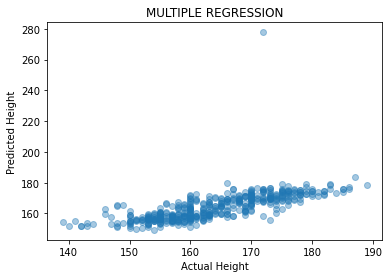

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("MULTIPLE REGRESSION")
plt.show()

- 선형성이 있는 것으로 보아 예측이 어느정도 잘 되었다고 할 수 있다.

## 모델의 정확도(Accuracy) 평가하기

### 잔차분석

In [17]:
print(linear.score(x_train, y_train))

0.6843361567634692


- 키 65%를 저 train항목의 7개로 설명할 수 있다는 의미

# OLS

## OLS 검정

In [18]:
target = df.iloc[:, [0]]
x_data = df.iloc[:, 1:]

In [19]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     589.1
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:44:25   Log-Likelihood:                -6880.6
No. Observations:                2214   AIC:                         1.378e+04
Df Residuals:                    2206   BIC:                         1.382e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         164.0849      3.901     42.060      0.000     156.434     171.735
age            -0.1715      0.007    -23.403      0.000      -0.186      -0.157
sex            11.0479      0.258     42.891      0.000      10.543      11.553
weight          0.1116      0.008     14.395      0.000       0.096       0.127
diastolic      -0.0039      0.005     -0.771      0.441      -0.014       0.006
systolic       -0.0077      0.007     -1.080      0.280      -0.022       0.006
temperature    -0.0736      0.105     -0.703      0.482      -0.279       0.132
pulse          -0.0102      0.006     -1.709      0.088      -0.022       0.001
==============================================================================
Omnibus:                      357.606   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2390.850
Skew:                          -0.582   Prob(JB):                         0.00
Kurtosis:                       7.956   Cond. No.                     6.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [27]:
a=sm.ols(formula = 'height ~ age + sex + weight + diastolic + systolic + temperature + pulse ', data=df).fit()
b=a.summary()

In [41]:
summary_arr = str(a.summary())
df_summary = pd.DataFrame([summary_arr])
df_summary.rename(columns={df_summary.columns[0]: "SUMMARY"}, inplace=True)

In [34]:
b

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     589.1
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:38   Log-Likelihood:                -6880.6
No. Observations:                2214   AIC:                         1.378e+04
Df Residuals:                    2206   BIC:                         1.382e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     164.0849      3.901     42.060      0.000     156.434     171.735
age            -0.1715      0.007    -23.403      0.000      -0.186      -0.157
sex            11.0479      0.258     42.891      0.000      10.543      11.553
weight          0.1116      0.008     14.395      0.000       0.096       0.127
diastolic      -0.0039      0.005     -0.771      0.441      -0.014       0.006
systolic       -0.0077      0.007     -1.080      0.280      -0.022       0.006
temperature    -0.0736      0.105     -0.703      0.482      -0.279       0.132
pulse          -0.0102      0.006     -1.709      0.088      -0.022       0.001
==============================================================================
Omnibus:                      357.606   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2390.850
Skew:                          -0.582   Prob(JB):                         0.00
Kurtosis:                       7.956   Cond. No.                     6.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
summary_arr.split()

['OLS',
 'Regression',
 'Results',
 '==============================================================================',
 'Dep.',
 'Variable:',
 'height',
 'R-squared:',
 '0.651',
 'Model:',
 'OLS',
 'Adj.',
 'R-squared:',
 '0.650',
 'Method:',
 'Least',
 'Squares',
 'F-statistic:',
 '589.1',
 'Date:',
 'Fri,',
 '21',
 'Jan',
 '2022',
 'Prob',
 '(F-statistic):',
 '0.00',
 'Time:',
 '11:56:21',
 'Log-Likelihood:',
 '-6880.6',
 'No.',
 'Observations:',
 '2214',
 'AIC:',
 '1.378e+04',
 'Df',
 'Residuals:',
 '2206',
 'BIC:',
 '1.382e+04',
 'Df',
 'Model:',
 '7',
 'Covariance',
 'Type:',
 'nonrobust',
 '===============================================================================',
 'coef',
 'std',
 'err',
 't',
 'P>|t|',
 '[0.025',
 '0.975]',
 '-------------------------------------------------------------------------------',
 'Intercept',
 '164.0849',
 '3.901',
 '42.060',
 '0.000',
 '156.434',
 '171.735',
 'age',
 '-0.1715',
 '0.007',
 '-23.403',
 '0.000',
 '-0.186',
 '-0.157',
 'sex',
 '11

In [59]:
b=summary_arr.split()

In [63]:
b[8]

'0.651'

## VIF를 통한 다중 공선성 확인

In [19]:
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
x_data2 = df[['age', 'sex', 'weight', 'diastolic', 'systolic', 'temperature', 'pulse']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,10.503281,age
1,2.537085,sex
2,20.785031,weight
3,13.627309,diastolic
4,66.543761,systolic
5,74.547080,temperature
6,19.755076,pulse


## mse값 도출

In [21]:
from sklearn.metrics import mean_squared_error

#변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = y_test["height"], y_pred = a.predict(x_test))
print(mse1)

KeyError: 'height'

# 상관분석

## corr()

In [26]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x, 2))
corr_df_unstack = corr_df.unstack()

In [27]:
corr_df

,height,age,sex,weight,diastolic,systolic,temperature,pulse
height,1.00,-0.39,0.71,0.51,0.05,0.14,-0.04,0.01
age,-0.39,1.00,-0.08,-0.16,-0.02,0.10,-0.04,-0.15
sex,0.71,-0.08,1.00,0.42,0.07,0.22,-0.07,-0.02
weight,0.51,-0.16,0.42,1.00,0.12,0.29,-0.02,0.01
diastolic,0.05,-0.02,0.07,0.12,1.00,0.39,-0.00,0.07
systolic,0.14,0.10,0.22,0.29,0.39,1.00,0.01,0.11
temperature,-0.04,-0.04,-0.07,-0.02,-0.00,0.01,1.00,0.07
pulse,0.01,-0.15,-0.02,0.01,0.07,0.11,0.07,1.00


In [28]:
corr_df.reset_index()

,index,height,age,sex,weight,diastolic,systolic,temperature,pulse
0,height,1.00,-0.39,0.71,0.51,0.05,0.14,-0.04,0.01
1,age,-0.39,1.00,-0.08,-0.16,-0.02,0.10,-0.04,-0.15
2,sex,0.71,-0.08,1.00,0.42,0.07,0.22,-0.07,-0.02
3,weight,0.51,-0.16,0.42,1.00,0.12,0.29,-0.02,0.01
4,diastolic,0.05,-0.02,0.07,0.12,1.00,0.39,-0.00,0.07
5,systolic,0.14,0.10,0.22,0.29,0.39,1.00,0.01,0.11
6,temperature,-0.04,-0.04,-0.07,-0.02,-0.00,0.01,1.00,0.07
7,pulse,0.01,-0.15,-0.02,0.01,0.07,0.11,0.07,1.00


## sort()

In [29]:
all = pd.DataFrame(corr_df_unstack[corr_df_unstack <= 1].sort_values(ascending=False), columns=['corr'])

In [30]:
all=all.reset_index()

In [31]:
col_name1 = 'x'
col_name2 = 'y'
col_name3 = 'corr'
all.columns=[col_name1, col_name2, col_name3]

In [32]:
all

,x,y,corr
0,pulse,pulse,1.00
1,temperature,temperature,1.00
2,age,age,1.00
3,sex,sex,1.00
4,weight,weight,1.00
...,...,...,...
59,pulse,age,-0.15
60,weight,age,-0.16
61,age,weight,-0.16
62,height,age,-0.39


C:\Users\chlal\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: x and y must be the same size

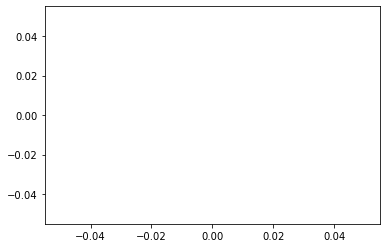

In [56]:
import seaborn as sns
sns.regplot(y_test)